Manually Plot Feature Importance

[0.0767704  0.28146198 0.08521528 0.07648949 0.08879327 0.15893967
 0.10558012 0.12674978]


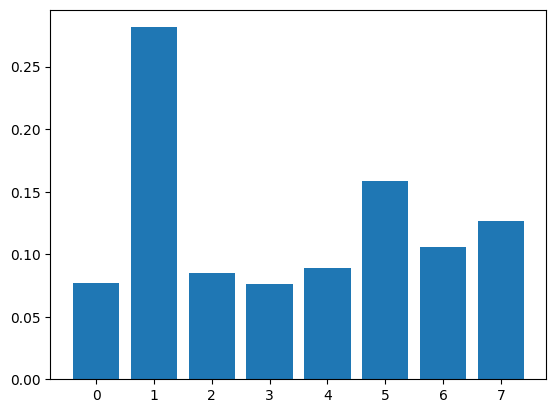

In [2]:
# Train XGBoost model, save to file using pickle, load and make predictions
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
# load data
dataset = pd.read_csv('course-data/diabetes.csv')
# split data into X and y
X = dataset.iloc[:, 0:8] 
Y = dataset.iloc[:, 8] 
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
# fit model on training data
model = XGBClassifier(
    booster='gbtree',  # The booster type to use, default is 'gbtree'
    objective='binary:logistic',  # Specify the learning task and the corresponding objective function
    learning_rate=0.1,  # Learning rate, default is 0.3
    max_depth=3,  # Maximum depth of a tree, default is 6
    n_estimators=100,  # Number of trees to fit, default is 100
    random_state=42  # Random seed for reproducibility
)
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

Using theBuilt-in XGBoost Feature Importance Plot

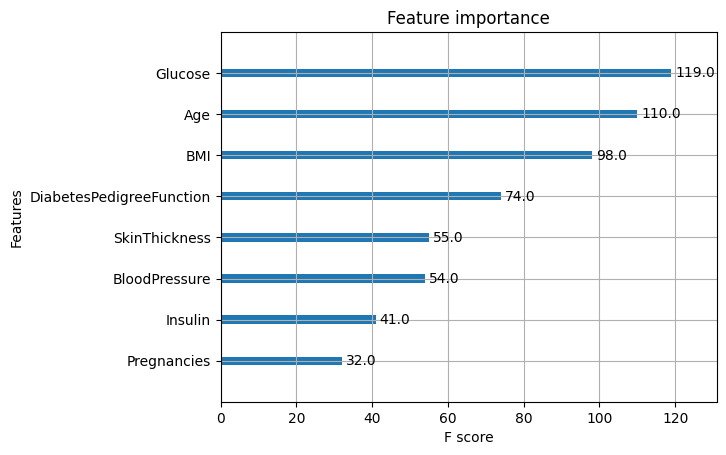

In [3]:
# plot feature importance using built-in function
import pandas as pd
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
# load data
dataset = pd.read_csv('course-data/diabetes.csv')
# split data into X and y
X = dataset.iloc[:, 0:8] 
Y = dataset.iloc[:, 8] 
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
# fit model on training data
model = XGBClassifier(
    booster='gbtree',  # The booster type to use, default is 'gbtree'
    objective='binary:logistic',  # Specify the learning task and the corresponding objective function
    learning_rate=0.1,  # Learning rate, default is 0.3
    max_depth=3,  # Maximum depth of a tree, default is 6
    n_estimators=100,  # Number of trees to fit, default is 100
    random_state=42  # Random seed for reproducibility
)
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()

Feature Selection with XGBoost Feature Importance Scores

In [4]:
# use feature importance for feature selection

# import warnings
# warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

import pandas as pd
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# Load data
dataset = pd.read_csv('course-data/diabetes.csv')

# Split data into X and y, convert to array to manage feature name conflict warning
X = dataset.iloc[:, 0:8].values  # Convert to NumPy array to remove feature names using .values
Y = dataset.iloc[:, 8].values  # Convert to NumPy array to remove feature names using .values

# Split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Fit model on training data
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Baseline Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # Train model
    selection_model = XGBClassifier(
        booster='gbtree',
        objective='binary:logistic',
        learning_rate=0.1,
        max_depth=3,
        n_estimators=100,
        random_state=42
    )
    selection_model.fit(select_X_train, y_train)
    
    # Evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))



Baseline Accuracy: 77.17%
Thresh=0.076, n=8, Accuracy: 77.17%
Thresh=0.077, n=7, Accuracy: 76.38%
Thresh=0.085, n=6, Accuracy: 77.17%
Thresh=0.089, n=5, Accuracy: 76.38%
Thresh=0.106, n=4, Accuracy: 77.56%
Thresh=0.127, n=3, Accuracy: 73.23%
Thresh=0.159, n=2, Accuracy: 75.59%
Thresh=0.281, n=1, Accuracy: 69.29%
